In [1]:
# main.py
import torch
from data import generate_nd_data
from normalize_data import normalize_data
from training import train_gp
from plotting import visualize_1d, visualize_2d


--- Training 1D model ---


d:\python\Lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


1D Metrics:
  MSE  = 0.0000
  NMSE = 0.0000
  MNLP = -138.2845


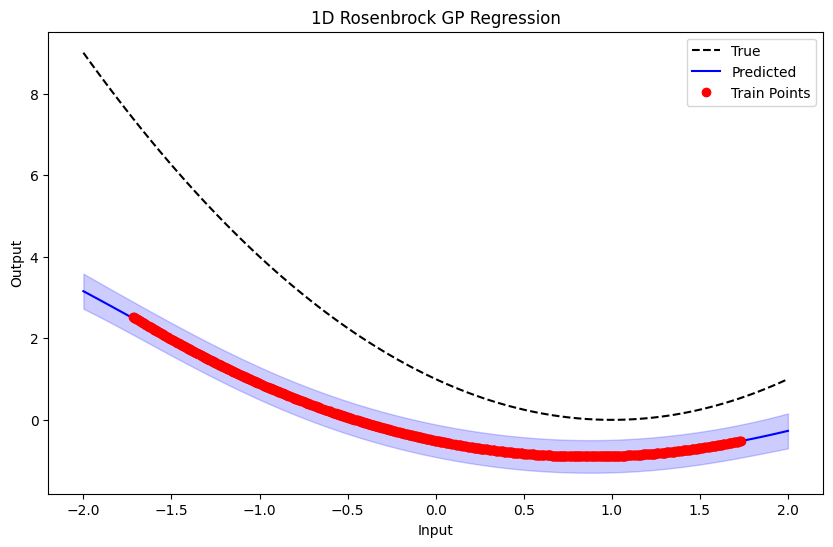


--- Training 2D model ---
2D Metrics:
  MSE  = 0.0007
  NMSE = 0.0006
  MNLP = -138.8894


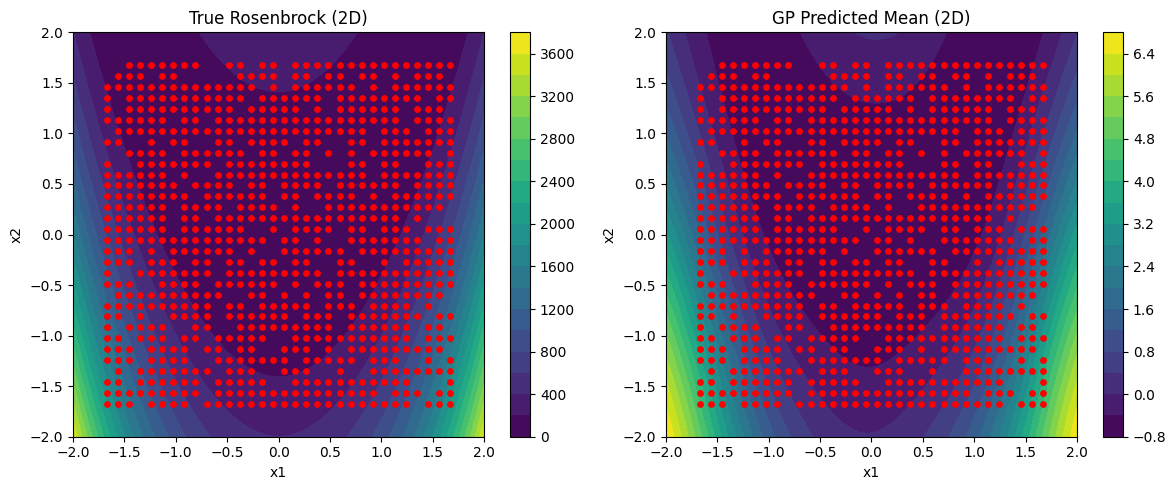


--- Training 3D model ---
3D Metrics:
  MSE  = 0.0017
  NMSE = 0.0019
  MNLP = -130.6205

--- Training 4D model ---
4D Metrics:
  MSE  = 0.0056
  NMSE = 0.0069
  MNLP = -119.7896

--- Training 5D model ---
5D Metrics:
  MSE  = 0.0257
  NMSE = 0.0242
  MNLP = -88.3228

=== Summary Metrics for 1D to 5D ===
1D -> MSE: 0.0000, NMSE: 0.0000, MNLP: -138.2845
2D -> MSE: 0.0007, NMSE: 0.0006, MNLP: -138.8894
3D -> MSE: 0.0017, NMSE: 0.0019, MNLP: -130.6205
4D -> MSE: 0.0056, NMSE: 0.0069, MNLP: -119.7896
5D -> MSE: 0.0257, NMSE: 0.0242, MNLP: -88.3228


In [2]:
def main():
    # Train models from 1D to 5D
    dims = [1, 2, 3, 4, 5]
    results = {}
    
    for d in dims:
        print(f"\n--- Training {d}D model ---")
        # Generate the data (all as torch.Tensors)
        X_train, X_test, y_train, y_test = generate_nd_data(dim=d)
        # Normalize the data (z-score normalization)
        X_train_norm, X_test_norm, y_train_norm, y_test_norm, norm_params = normalize_data(
            X_train, X_test, y_train, y_test
        )
        
        # Train the GP model and evaluate using MSE, NMSE, MNLP
        model, metrics = train_gp(
            X_train_norm, y_train_norm, X_test_norm, y_test_norm, 
            dim=d, train_iter=300, lr=0.01
        )
        results[d] = metrics
        
        print(f"{d}D Metrics:")
        print(f"  MSE  = {metrics['MSE']:.4f}")
        print(f"  NMSE = {metrics['NMSE']:.4f}")
        print(f"  MNLP = {metrics['MNLP']:.4f}")
        
        # Visualize only for 1D and 2D cases
        if d == 1:
            visualize_1d(model, X_train_norm, y_train_norm)
        elif d == 2:
            visualize_2d(model, X_train_norm, y_train_norm)
    
    print("\n=== Summary Metrics for 1D to 5D ===")
    for d, m in results.items():
        print(f"{d}D -> MSE: {m['MSE']:.4f}, NMSE: {m['NMSE']:.4f}, MNLP: {m['MNLP']:.4f}")

# scale back at the end.

if __name__ == "__main__":
    main()
